## This notebook contains a simple introduction to TF
### as used in MSTC seminar on Deep Learning & Tensorflow

In [1]:
import tensorflow as tf

x=tf.constant(1.0)
W=tf.constant(6.0)
b=tf.constant(1.5)

y=x*W+b

print(y)

Tensor("add:0", shape=(), dtype=float32)


In [2]:
with tf.Session() as sess:
    print(sess.run(y))

7.5


### Now let's see a simple use of Variables in Tensorflow

In [8]:
x=tf.constant(1.0)
W=tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b=tf.Variable(tf.zeros([1]))

# Before starting, initialize the variables
init = tf.global_variables_initializer()

y=x*W+b

with tf.Session() as sess:
    sess.run(init)
    for step in range(4):
        print(sess.run(y))



[-0.61182857]
[-0.61182857]
[-0.61182857]
[-0.61182857]


### Placeholders: computational graph entry points

In [12]:
x=tf.placeholder(tf.float32)
W=tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b=tf.Variable(tf.zeros([1]))

# Before starting, initialize the variables
init = tf.global_variables_initializer()

y=x*W+b

with tf.Session() as sess:
    sess.run(init)
    for step in range(4):
        print(sess.run(y,feed_dict={x:1.0}))


[ 0.35493803]
[ 0.35493803]
[ 0.35493803]
[ 0.35493803]


## Logistic regression in TensorFlow

https://gist.github.com/fuglede/ad04ce38e80887ddcbeb6b81e97bbfbc



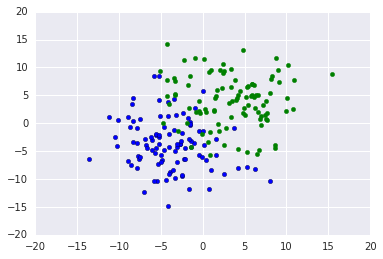

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

group1 = np.random.multivariate_normal([-4, -4], 20*np.identity(2), size=100)
group2 = np.random.multivariate_normal([4, 4], 20*np.identity(2), size=100)
plt.scatter(group1.T[0][:],group1.T[1][:])
plt.scatter(group2.T[0][:],group2.T[1][:],color='g')
plt.show()

####     Our prediction function will be the logistic or sigmoid function 
$p(X) = 1/(1 + \exp(w^tX + b))$, taking values between $0$ and $1$.

* $p(X)$ represents the probability that the point $X$ should be labelled "green". Here's what its logarithm looks like:

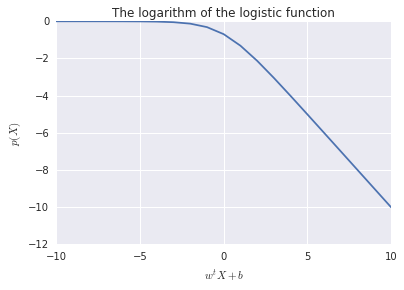

In [31]:
x = np.arange(-10, 11)
plt.title('The logarithm of the logistic function')
plt.xlabel('$w^t X + b$')
plt.ylabel('$p(X)$')
plt.plot(x, np.log(1/(1+np.exp(x))));



In [32]:
# Inputs are now two-dimensional and come with labels "blue" or "green" (represented by 0 or 1)
X = tf.placeholder("float", shape=[None, 2])
labels = tf.placeholder("float", shape=[None])

# Set model weights and bias as before
W = tf.Variable(tf.zeros([2, 1], "float"), name="weight")
b = tf.Variable(tf.zeros([1], "float"), name="bias")

# Predictor is now the logistic function
pred = tf.sigmoid(tf.to_double(tf.reduce_sum(tf.matmul(X, W), axis=[1]) + b))


###  cost function will be the cross-entropy, $$-\sum_{i=1}^n l(X_i) \log(p(X_i)) + (1-l(X_i))\log(1-p(X_i)),$$ where $l(X_i)$ is the label of $X_i$ (which is $0$ or $1$).


In [33]:
# Cost function is cross-entropy
cost = -tf.reduce_sum(tf.to_double(labels) * tf.log(pred) + (1-tf.to_double(labels)) * tf.log(1-pred))

# Gradient descent
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

### Now we run our optimization and plot the resulting values of $p$

('W = ', array([[ 0.58852369],
       [ 0.46921799]], dtype=float32))
('b = ', array([ 0.26713014], dtype=float32))


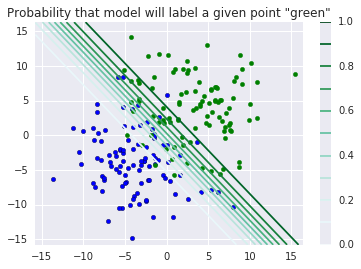

In [41]:
import matplotlib.cm as cm
import seaborn as sns

n_samples=200
batch_size=40

with tf.Session() as sess:
    # We stack our two groups of 2-dimensional points and label them 0 and 1 respectively
    train_X = np.vstack((group1, group2))
    train_labels = np.array([0.0] * 100 + [1.0] * 100)


    sess.run(init)

    # Run the optimization algorithm 1000 times
    for i in range(1000):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, labels_batch = train_X[indices], train_labels[indices]
        sess.run(optimizer, feed_dict={X: X_batch, labels: labels_batch})
        #sess.run(optimizer, feed_dict={X: train_X, labels: train_labels})
        
    # Plot the predictions: the values of p
    Xmin = np.min(train_X)-1
    Xmax = np.max(train_X)+1
    x = np.arange(Xmin, Xmax, 0.1)
    y = np.arange(Xmin, Xmax, 0.1)
    
    #plt.plot(*group1.T, 'o')
    #plt.plot(*group2.T, 'o')
    plt.scatter(group1.T[0][:],group1.T[1][:])
    plt.scatter(group2.T[0][:],group2.T[1][:],color='g')
    plt.xlim(Xmin, Xmax)
    plt.ylim(Xmin, Xmax)
    print('W = ', sess.run(W))
    print('b = ', sess.run(b))
    
    xx, yy = np.meshgrid(x, y)
    predictions = sess.run(pred, feed_dict={X: np.array((xx.ravel(), yy.ravel())).T})
    
    plt.title('Probability that model will label a given point "green"')
    plt.contour(x, y, predictions.reshape(len(x), len(y)), cmap=cm.BuGn, levels=np.arange(0.0, 1.1, 0.1))
    plt.colorbar()